# Correlation Analysis Between Parameters

### In this notebook I try to find If there is correlation between parameter

In [7]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp


import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr

pd.set_option('display.max_rows', None)

In [8]:
# Get parameters from notebook 1

%store -r open_communication
%store -r parameter_2
%store -r parameter_3
%store -r parameter_4
%store -r parameter_5
%store -r parameter_6
%store -r parameter_7
%store -r parameter_8
%store -r parameter_9
%store -r parameter_10
%store -r parameter_11
%store -r parameter_12
%store -r parameter_13

In [9]:
#replace string with integer 1-5 in parameter 13
parameter_13.loc[parameter_13['score'] == 'Άριστο', 'score'] = 5
parameter_13.loc[parameter_13['score'] == 'Πολύ Καλό', 'score'] = 4
parameter_13.loc[parameter_13['score'] == 'Καλό', 'score'] = 3
parameter_13.loc[parameter_13['score'] == 'Μέτριο', 'score'] = 2
parameter_13.loc[parameter_13['score'] == 'Κακό', 'score'] = 1

#### Create scores for every parameter 

In [10]:
score1 = open_communication.sum(axis=1)/3
score2 = parameter_2.sum(axis=1)/3
score3 = parameter_3.sum(axis=1)/3
score4 = parameter_4.sum(axis=1)/4
score5 = parameter_5.sum(axis=1)/3
score6 = parameter_6.sum(axis=1)/4
score7 = parameter_7.sum(axis=1)/4
score8 = parameter_8.sum(axis=1)/3
score9 = parameter_9.sum(axis=1)/4
score10 = parameter_10.sum(axis=1)/4
score11 = parameter_11.sum(axis=1)/3
score12 = parameter_12.sum(axis=1)/4
score13 = parameter_13.sum(axis=1)


In [11]:
allScores = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11,score12,score13],axis=1)

allScores.columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13']

In [12]:
allScores.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
p1,1.000000,0.661106,0.457921,0.326834,0.358695,0.466382,0.152244,0.320052,0.167542,-0.285613,0.194321,0.339446,0.057428
p2,0.661106,1.000000,0.527542,0.344365,0.286988,0.481467,0.149379,0.406257,0.293467,-0.207009,0.480818,0.370686,0.168084
p3,0.457921,0.527542,1.000000,0.550557,0.309311,0.443038,0.078351,0.469916,0.414833,-0.177133,0.446791,0.559892,0.324355
p4,0.326834,0.344365,0.550557,1.000000,0.130766,0.454487,0.080503,0.455063,0.526586,-0.174922,0.331541,0.392960,0.355769
p5,0.358695,0.286988,0.309311,0.130766,1.000000,0.246095,0.350316,0.282522,0.238093,-0.217435,-0.009671,0.333497,0.194388
p6,0.466382,0.481467,0.443038,0.454487,0.246095,1.000000,0.230600,0.504536,0.383235,-0.236315,0.284207,0.430528,0.257391
p7,0.152244,0.149379,0.078351,0.080503,0.350316,0.230600,1.000000,0.464127,0.359001,-0.330637,0.060027,0.510450,0.310724
p8,0.320052,0.406257,0.469916,0.455063,0.282522,0.504536,0.464127,1.000000,0.569822,-0.376320,0.390626,0.665902,0.421213
p9,0.167542,0.293467,0.414833,0.526586,0.238093,0.383235,0.359001,0.569822,1.000000,-0.570905,0.403151,0.433262,0.539415
p10,-0.285613,-0.207009,-0.177133,-0.174922,-0.217435,-0.236315,-0.330637,-0.376320,-0.570905,1.000000,-0.200399,-0.300246,-0.158320


<AxesSubplot:>

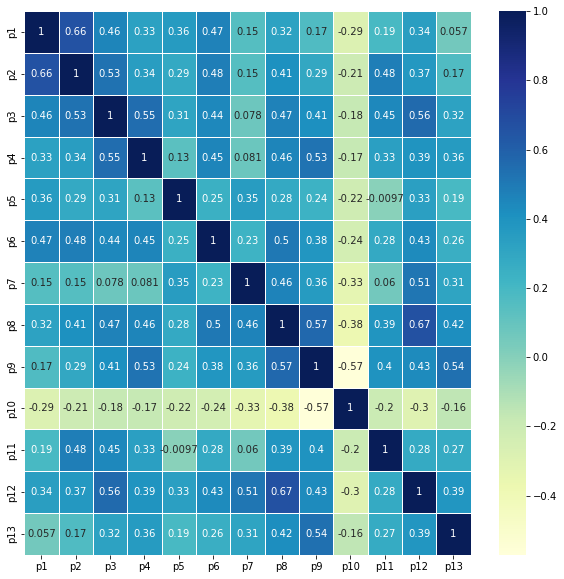

In [13]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(allScores.corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)